In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

from geopy.geocoders import Nominatim
from shapely.geometry import Point

from geopy.extra.rate_limiter import RateLimiter
import numpy as np  

from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim  
import time

In [ ]:
# set working directory
os.chdir('C:/Users/blah/blah/Documents/Data/WI_RAD')

print("Current Working Directory:", os.getcwd())

# read in datafiles

In [ ]:
RAD_map_df = pd.read_excel('RAD_seperatedcat_new_final.xlsx', 
                           sheet_name = "Combined")
neighborhood_tracts = gpd.read_file('C:/Users/blah/blah/Documents/Data/Misc/dcdneighborhoods/DCDNeighborhoods.shp')
neighborhood_tracts = neighborhood_tracts.rename(columns = {"Neighborho" : "Neighborhood"})

# merge dataframes
neighborhood_tracts["Neighborhood"] = neighborhood_tracts["Neighborhood"].str.lower()
RAD_merged = pd.merge(RAD_map_df, neighborhood_tracts, on = "Neighborhood", how = "outer")

# turn merged dataframe into a geopandas df
RAD_merged = gpd.GeoDataFrame(RAD_merged, geometry='geometry')
RAD_merged.to_crs(epsg = 26916, inplace = True)

new_RAD_df = pd.read_excel('RAD_seperatedcat_and_combined_edited.xlsx', sheet_name = 'Maps')

# merge dataframes
neighborhood_tracts["Neighborhood"] = neighborhood_tracts["Neighborhood"].str.lower()
new_RAD_df_merged = pd.merge(new_RAD_df, neighborhood_tracts, on = "Neighborhood", how = "outer")

# turn merged dataframe into geopandas df
new_RAD_df_merged = gpd.GeoDataFrame(new_RAD_df_merged, geometry = 'geometry')
new_RAD_df_merged.to_crs(epsg = 26916, inplace = True)

# Calculating the necessary rates

In [ ]:
RAD_merged["black_pedrate"] = (RAD_merged["black_pedstops"] / RAD_merged["black_not_hisp_avg"]) * 1000
RAD_merged["white_pedrate"] = (RAD_merged["white_pedstops"] / RAD_merged["white_not_hisp_avg"]) * 1000

RAD_merged["black_vicrate"] = (RAD_merged["black_total_vic"] / RAD_merged["black_not_hisp_avg"]) * 1000
RAD_merged["white_vicrate"] = (RAD_merged["white_total_vic"] / RAD_merged["white_not_hisp_avg"]) * 1000

RAD_merged["black_ratio"] = RAD_merged["black_pedrate"] / RAD_merged["black_vicrate"]
RAD_merged["white_ratio"] = RAD_merged["white_pedrate"] / RAD_merged["white_vicrate"]

RAD_merged["total_victimization_per1000"] = (RAD_merged["total_PartI_II_combined"] / RAD_merged["totalpop_avg"]) * 1000
RAD_merged["total_stoprate_per1000"] = (RAD_merged["total_pedstops"] / RAD_merged["totalpop_avg"]) * 1000

RAD_merged["RAD"] = RAD_merged["black_ratio"] / RAD_merged["white_ratio"]

RAD_merged["percent_blackpop_100"] = RAD_merged["percent_blackpop"] * 100
RAD_merged["percent_whitepop_100"] = RAD_merged["percent_whitepop"] * 100
RAD_merged["RAD_2"] = RAD_merged["RAD"].replace([np.inf, -np.inf], np.nan)

new_RAD_df_merged["black_pedrate"] = (new_RAD_df_merged["black_pedstops"] / new_RAD_df_merged["black_not_hisp_avg"]) * 1000
new_RAD_df_merged["white_pedrate"] = (new_RAD_df_merged["white_pedstops"] / new_RAD_df_merged["white_not_hisp_avg"]) * 1000

new_RAD_df_merged["black_vicrate"] = (new_RAD_df_merged["black_totalvic"] / new_RAD_df_merged["black_not_hisp_avg"]) * 1000
new_RAD_df_merged["white_vicrate"] = (new_RAD_df_merged["white_totalvic"] / new_RAD_df_merged["white_not_hisp_avg"]) * 1000

new_RAD_df_merged["black_ratio"] = new_RAD_df_merged["black_pedrate"] / new_RAD_df_merged["black_vicrate"]
new_RAD_df_merged["white_ratio"] = new_RAD_df_merged["white_pedrate"] / new_RAD_df_merged["white_vicrate"]

new_RAD_df_merged["total_victimization_per1000"] = (new_RAD_df_merged["total_PartI_II_combined"] / new_RAD_df_merged["totalpop_avg"]) * 1000
new_RAD_df_merged["total_stoprate_per1000"] = (new_RAD_df_merged["Total Peds"] / new_RAD_df_merged["totalpop_avg"]) * 1000

new_RAD_df_merged["RAD"] = new_RAD_df_merged["black_ratio"] / new_RAD_df_merged["white_ratio"]

new_RAD_df_merged["percent_blackpop_100"] = new_RAD_df_merged["percent_blackpop"] * 100
new_RAD_df_merged["percent_whitepop_100"] = new_RAD_df_merged["percent_whitepop"] * 100
new_RAD_df_merged["RAD_2"] = new_RAD_df_merged["RAD"].replace([np.inf, -np.inf], np.nan)

RAD_merged["allrace_pedstops"] = RAD_merged['white_pedstops'] + RAD_merged['black_pedstops'] + RAD_merged['latinx_pedstops'] + RAD_merged['other_pedstops']
new_RAD_df_merged["allrace_pedstops"] = new_RAD_df_merged['white_pedstops'] + new_RAD_df_merged['black_pedstops'] + new_RAD_df_merged['latinx_pedstops'] + new_RAD_df_merged['other_pedstops']

In [ ]:
RAD_merged.columns
new_RAD_df_merged.columns

Index(['Neighborhood', 'totalpop_avg', 'white_not_hisp_avg',
       'black_not_hisp_avg', 'white_pedstops', 'black_pedstops',
       'black_Part I_vic', 'white_Part I_vic', 'black_Part II_vic',
       'white_Part II_vic', 'black_totalvic', 'white_totalvic',
       'percent_blackpop', 'percent_whitepop', 'blackstoprate',
       'whitestoprate', 'blackvictimrate', 'whitevictimrate',
       'blackratesratio', 'whiteratesratio', 'RADIndex', 'RAD_interpreted',
       'RADType', 'latinx_pedstops', 'other_pedstops', 'Total Peds',
       'total_PartI_II_combined', 'OBJECTID', 'SYMBOL', 'Neighbor_1',
       'SHAPE_STAr', 'SHAPE_STLe', 'geometry', 'black_pedrate',
       'white_pedrate', 'black_vicrate', 'white_vicrate', 'black_ratio',
       'white_ratio', 'total_victimization_per1000', 'total_stoprate_per1000',
       'RAD', 'percent_blackpop_100', 'percent_whitepop_100', 'RAD_2'],
      dtype='object')

In [6]:
missing = RAD_merged[RAD_merged["allrace_pedstops"].isna()]
print(f"Missing pedestrian stop data in {len(missing)} neighborhoods")
print(missing[["Neighborhood", "allrace_pedstops"]])

Missing pedestrian stop data in 40 neighborhoods
                Neighborhood  allrace_pedstops
0                alcott park               NaN
1                    alverno               NaN
12           brown deer park               NaN
14               buchel park               NaN
18               cannon park               NaN
22             clayton crest               NaN
28               cooper park               NaN
29           copernicus park               NaN
32              dretzka park               NaN
34            estabrook park               NaN
35               euclid park               NaN
43           freedom village               NaN
46             golden valley               NaN
47              goldman park               NaN
66          highwood estates               NaN
68            hilltop parish               NaN
72         honey creek manor               NaN
73       honey creek parkway               NaN
75           johnson's woods               NaN
76         

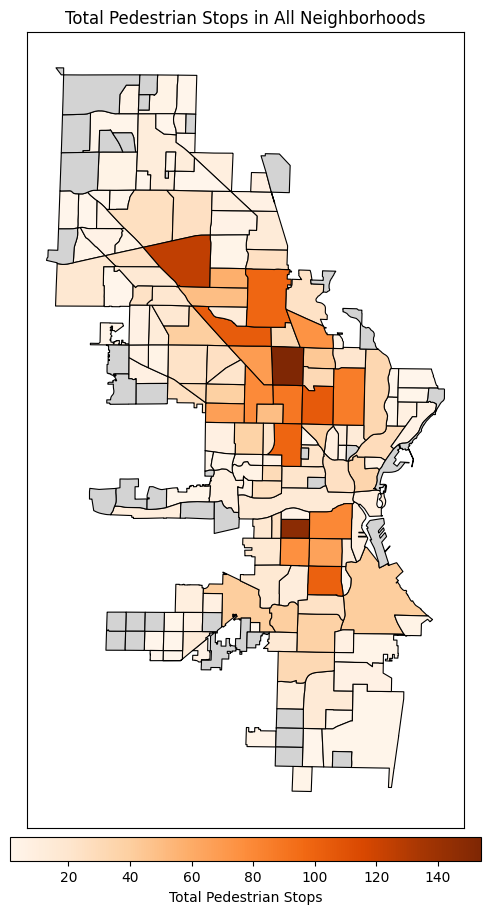

In [ ]:
# plotting the total victim rate 
fig, ax = plt.subplots(figsize = (16, 10))

RAD_merged.plot(ax = ax, column = "allrace_pedstops",
                cmap = "Oranges",
                legend = True,
                edgecolor = "black",
                linewidth = 0.8,
                missing_kwds = {"color": "lightgrey"},
                legend_kwds = {
                    "shrink" : 0.3,
                    "orientation" : "horizontal",
                    "pad" : 0.01,
                    "label" : f"Total Pedestrian Stops"
                })


ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title("Total Pedestrian Stops in All Neighborhoods")

plt.tight_layout()
plt.show()

In [ ]:
print(len(RAD_merged['Neighborhood']))

190


In [ ]:
RAD_merged.to_csv("RAD_merged1.csv")

# Plotting Victim rate (neighborhood color) with total pedestrian stop rate (plot point)

In [ ]:
print("White pedestrian rates")
print(RAD_merged["white_pedrate"].min())
print(RAD_merged["white_pedrate"].max())
print(RAD_merged["white_pedrate"].mean())

print("Black pedestrian rates")
print(RAD_merged["black_pedrate"].min())
print(RAD_merged["black_pedrate"].max())
print(RAD_merged["black_pedrate"].mean())

White pedestrian rates
0.0
24.765490193344043
1.9731280521212973
Black pedestrian rates
0.0
4541.703419003488
50.80433913707138


In [ ]:
RAD_merged.columns

Index(['Neighborhood', 'total_PartI_II_combined', 'totalpop_avg',
       'white_not_hisp_avg', 'black_not_hisp_avg', 'white_pedstops',
       'black_pedstops', 'latinx_pedstops', 'other_pedstops',
       'black_Part I_vic', 'white_Part I_vic', 'AI_AN_Part I_vic',
       'Asian_Part I_vic', 'NH_PI_Part I_vic', 'hispanic_Part I_vic',
       'other_Part I_vic', 'percent_blackpop', 'percent_whitepop',
       'total_PartI_vic', 'total_pedstops_x', 'latinx_pedstops_y',
       'other_pedstops_y', 'black_Part II_vic', 'white_Part II_vic',
       'AI_AN_Part II_vic', 'Asian_Part II_vic', 'NH_PI_Part II_vic',
       'hispanic_Part II_vic', 'other_Part II_vic', 'total_PartII_vic',
       'total_pedstops_y', 'black_total_vic', 'white_total_vic',
       'total_pedstops', 'OBJECTID', 'SYMBOL', 'Neighbor_1', 'SHAPE_STAr',
       'SHAPE_STLe', 'geometry', 'black_pedrate', 'white_pedrate',
       'black_vicrate', 'white_vicrate', 'black_ratio', 'white_ratio',
       'total_victimization_per1000', 'tota

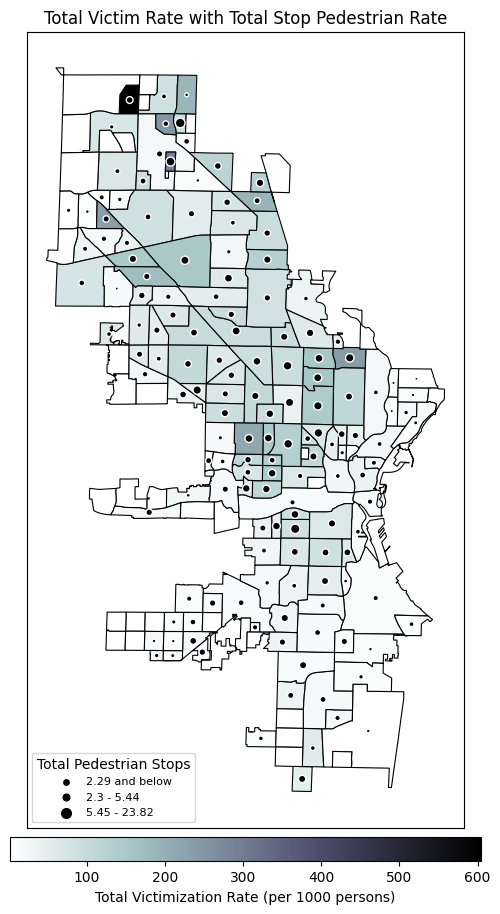

In [ ]:
# plotting the total victim rate 
fig, ax = plt.subplots(figsize = (16, 10))

RAD_merged.plot(ax = ax, column = "total_victimization_per1000",
                cmap = "bone_r",
                legend = True,
                edgecolor = "black",
                linewidth = 0.8,
                missing_kwds = {"color": "white"},
                legend_kwds = {
                    "shrink" : 0.3,
                    "orientation" : "horizontal",
                    "pad" : 0.01,
                    "label" : f"Total Victimization Rate (per 1000 persons)"
                })

# calculate the center point of each neighborhood
centroids = RAD_merged.geometry.centroid
x_coords = centroids.x
y_coords = centroids.y 

# calculate circles based on total stop rate
stoprate_sizes = np.sqrt(RAD_merged["total_stoprate_per1000"]) * 10 

# add in the bubbles
ax.scatter(x_coords, y_coords, s = stoprate_sizes, c = "black", alpha = 1,
           edgecolor = "white", linewidth = 1)

ax.set_title("Total Victim Rate with Total Stop Pedestrian Rate")

# anchor values
valid_values = RAD_merged["total_stoprate_per1000"][RAD_merged["total_stoprate_per1000"] > 0]
low_val = round(np.percentile(valid_values, 33), 2)
med_val = round(np.percentile(valid_values, 66), 2)
high_val = round(valid_values.max(), 2)
min_val = round(valid_values.min(), 2)

legend_labels = [
    f"{low_val} and below",
    f"{low_val + 0.01} - {med_val}",
    f"{med_val + 0.01} - {high_val}"
]

legend_sizes = [low_val, med_val, high_val]

legend_elements = [
    ax.scatter([], [], s = np.sqrt(size) * 10, c = "black", alpha = 1,
               edgecolors = "black", linewidth = 1, label = label)
    for size, label in zip(legend_sizes, legend_labels)
]

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(handles = legend_elements, title = "Total Pedestrian Stops", 
          loc = "lower left", frameon = True, fontsize = 8, title_fontsize = 10)

plt.tight_layout()
plt.show()

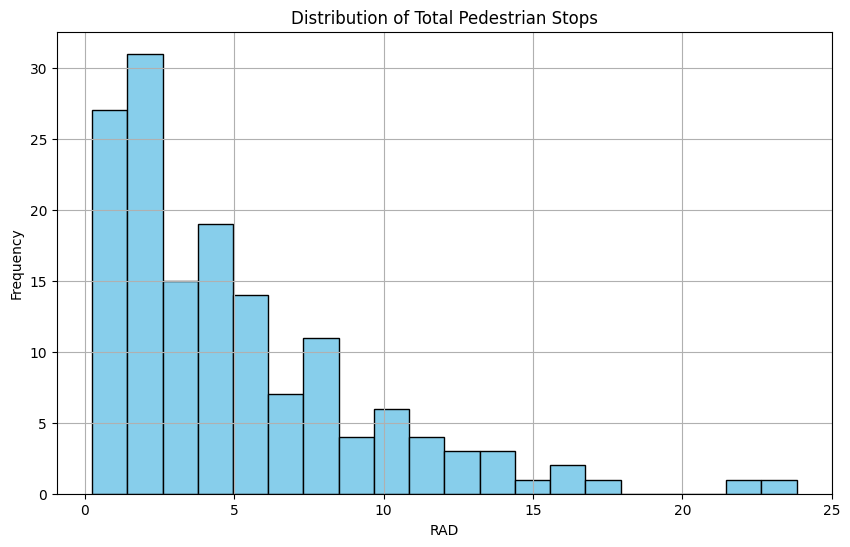

In [ ]:
data = RAD_merged["total_stoprate_per1000"]

plt.figure(figsize = (10, 6))
plt.hist(data, bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title("Distribution of Total Pedestrian Stops")
plt.xlabel("RAD")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Plotting disparity interpretation as neighborhood colors

In [ ]:
new_RAD_df_merged.columns

Index(['Neighborhood', 'totalpop_avg', 'white_not_hisp_avg',
       'black_not_hisp_avg', 'white_pedstops', 'black_pedstops',
       'black_Part I_vic', 'white_Part I_vic', 'black_Part II_vic',
       'white_Part II_vic', 'black_totalvic', 'white_totalvic',
       'percent_blackpop', 'percent_whitepop', 'blackstoprate',
       'whitestoprate', 'blackvictimrate', 'whitevictimrate',
       'blackratesratio', 'whiteratesratio', 'RADIndex', 'RAD_interpreted',
       'RADType', 'latinx_pedstops', 'other_pedstops', 'Total Peds',
       'total_PartI_II_combined', 'OBJECTID', 'SYMBOL', 'Neighbor_1',
       'SHAPE_STAr', 'SHAPE_STLe', 'geometry', 'black_pedrate',
       'white_pedrate', 'black_vicrate', 'white_vicrate', 'black_ratio',
       'white_ratio', 'total_victimization_per1000', 'total_stoprate_per1000',
       'RAD', 'percent_blackpop_100', 'percent_whitepop_100', 'RAD_2',
       'allrace_pedstops'],
      dtype='object')

In [ ]:
print(new_RAD_df_merged['RAD_interpreted'].min())
print(new_RAD_df_merged['RAD_interpreted'].max())
print(new_RAD_df_merged['RAD_interpreted'].mean())

0.0
14.999999999999998
3.874141898587169


C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_16760\3947326379.py:211: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.5)


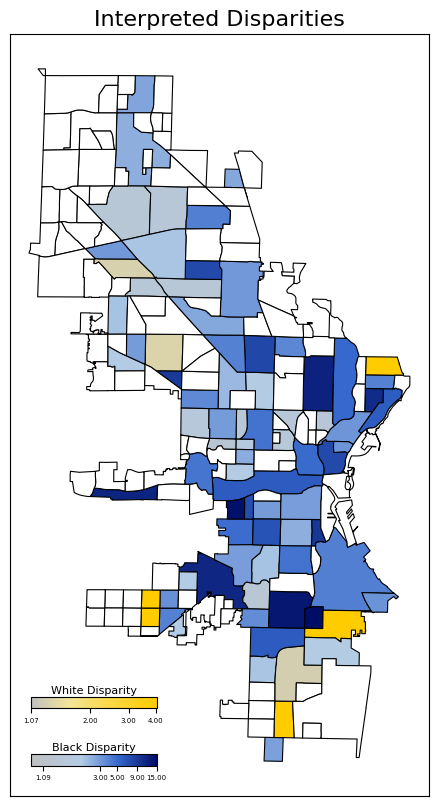

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Thresholds ---
neutral_val = 1.0
white_min = 1.0667
white_max = 4.02778
black_min = 1.084070796
black_max = 15.0
blend_low = 1.05
blend_high = 1.09

# --- Create valid color gradients within the 0-1 range ---
n_colors = 256

# Make sure all colors are within the 0-1 range
grey_color = np.array([0.75, 0.75, 0.75, 1.0])  # Light grey
light_blue = np.array([0.7, 0.8, 0.9, 1.0])  # Light blue
medium_blue = np.array([0.2, 0.4, 0.8, 1.0])  # Medium blue
dark_blue = np.array([0.0, 0.05, 0.4, 1.0])  # Dark blue (almost navy)

# --- IMPROVED WHITE DISPARITY GRADIENT ---
# Define intermediate colors for better distinction in yellow range
light_yellow = np.array([0.95, 0.9, 0.6, 1.0])  # Light yellow
medium_yellow = np.array([0.98, 0.85, 0.3, 1.0])  # Medium yellow
bright_yellow = np.array([1.0, 0.8, 0.0, 1.0])  # Bright golden yellow

# For white disparity: multi-step gradient from grey to yellow
white_colors = np.zeros((n_colors, 4))
for i in range(n_colors):
    t = i / (n_colors - 1)
    if t < 0.3:  # First segment: grey to light yellow (for lower values)
        segment_t = t / 0.3
        white_colors[i] = grey_color * (1 - segment_t) + light_yellow * segment_t
    elif t < 0.6:  # Second segment: light yellow to medium yellow
        segment_t = (t - 0.3) / 0.3
        white_colors[i] = light_yellow * (1 - segment_t) + medium_yellow * segment_t
    else:  # Third segment: medium yellow to bright yellow (for high values)
        segment_t = (t - 0.6) / 0.4
        white_colors[i] = medium_yellow * (1 - segment_t) + bright_yellow * segment_t
    # Ensure values are within 0-1 range
    white_colors[i] = np.clip(white_colors[i], 0.0, 1.0)

# --- KEEP ORIGINAL BLACK DISPARITY GRADIENT ---
# For black disparity: enhanced grey to blue gradient (KEPT AS-IS)
black_colors = np.zeros((n_colors, 4))
for i in range(n_colors):
    t = i / (n_colors - 1)
    if t < 0.4:  # First segment: grey to light blue (for lower values)
        segment_t = t / 0.4
        black_colors[i] = grey_color * (1 - segment_t) + light_blue * segment_t
    elif t < 0.7:  # Second segment: light blue to medium blue (for mid values)
        segment_t = (t - 0.4) / 0.3
        black_colors[i] = light_blue * (1 - segment_t) + medium_blue * segment_t
    else:  # Third segment: medium blue to dark blue (for high values)
        segment_t = (t - 0.7) / 0.3
        black_colors[i] = medium_blue * (1 - segment_t) + dark_blue * segment_t
    # Ensure values are within 0-1 range
    black_colors[i] = np.clip(black_colors[i], 0.0, 1.0)

# Create colormaps from the gradients
white_cmap = mcolors.ListedColormap(white_colors)
black_cmap = mcolors.ListedColormap(black_colors)

# For the combined map - create a smooth transition
n_white = 100
n_neutral = 20
n_black = 120

# Create combined colormap
combined_colors = np.zeros((n_white + n_neutral + n_black, 4))

# Add white disparity colors (reversed)
combined_colors[:n_white] = white_colors[np.linspace(n_colors-1, 0, n_white).astype(int)]

# Add neutral grey section
combined_colors[n_white:n_white+n_neutral] = grey_color

# Add black disparity colors
combined_colors[n_white+n_neutral:] = black_colors[np.linspace(0, n_colors-1, n_black).astype(int)]

# Ensure all values are in valid range
combined_colors = np.clip(combined_colors, 0.0, 1.0)
combined_cmap = mcolors.ListedColormap(combined_colors)

# --- Improved Normalization Class ---
class EnhancedGradientNormalize(mcolors.Normalize):
    def __init__(self, neutral, white_min, white_max, black_min, black_max, blend_low, blend_high):
        super().__init__(vmin=neutral, vmax=black_max)
        self.neutral = neutral
        self.white_min = white_min
        self.white_max = white_max 
        self.black_min = black_min 
        self.black_max = black_max 
        self.blend_low = blend_low 
        self.blend_high = blend_high
        
        # Calculate segment lengths for the colormap
        self.total_segments = n_white + n_neutral + n_black
        self.white_segment = n_white / self.total_segments
        self.neutral_segment = n_neutral / self.total_segments
        self.black_segment = n_black / self.total_segments

    def __call__(self, value, clip=None):
        value = np.asarray(value)
        result = np.zeros_like(value, dtype=float)
        
        # Neutral values (grey)
        neutral_mask = (value >= self.neutral) & (value < self.blend_low)
        # Place neutral values in the middle of the colormap
        midpoint = (n_white + n_neutral/2) / self.total_segments
        result[neutral_mask] = midpoint
        
        # --- IMPROVED WHITE DISPARITY MAPPING ---
        white_mask = (value >= self.blend_low) & (value <= self.white_max)
        if np.any(white_mask):
            # Apply stronger transformation for better visual distinction
            normalized_value = (value[white_mask] - self.blend_low) / (self.white_max - self.blend_low)
            # Use power transform with lower exponent to spread values better
            transformed_val = np.power(normalized_value, 0.4)  # Lower power = more spread
            # Map to range [0, white_segment] and invert (yellow at beginning of colormap)
            white_position = self.white_segment * (1 - transformed_val)
            result[white_mask] = white_position
        
        # Black disparity: keep original implementation
        black_mask = (value >= self.blend_high) & (value <= self.black_max)
        if np.any(black_mask):
            # Enhanced power scaling with better distribution across common values
            # Use a lower power (0.3) to spread out lower values even more
            transformed_val = np.power((value[black_mask] - self.blend_high) / (self.black_max - self.blend_high), 0.3)
            
            # Map to range [neutral_segment + white_segment, 1]
            black_position = (self.white_segment + self.neutral_segment) + self.black_segment * transformed_val
            result[black_mask] = black_position
            
        return np.ma.masked_array(result)

# Use enhanced normalization
norm = EnhancedGradientNormalize(
    neutral=neutral_val,
    white_min=white_min,
    white_max=white_max,
    black_min=black_min,
    black_max=black_max,
    blend_low=blend_low,
    blend_high=blend_high
)

# --- IMPROVED WHITE NORMALIZATION ---
# Use LogNorm instead of PowerNorm for better distribution of white disparity values
white_norm = mcolors.LogNorm(vmin=white_min, vmax=white_max)

# Keep original black normalization
black_norm = mcolors.PowerNorm(gamma=0.3, vmin=black_min, vmax=black_max)

# --- Figure Layout ---
fig, ax = plt.subplots(figsize=(10, 8))

# --- Plot Map ---
new_RAD_df_merged.plot(
    ax=ax,
    column="RAD_interpreted",
    cmap=combined_cmap,
    norm=norm,
    legend=False,
    edgecolor="black",
    linewidth=0.8,
    missing_kwds={"color": "white"}
)

ax.set_title("Interpreted Disparities", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")


# --- Inset Legend inside Map (bottom-left corner) ---
# White bar (top of stack)
white_bar = inset_axes(ax, width="100%", height="15%", loc="upper left",
                       bbox_to_anchor=(0.05, 0.03, 0.3, 0.1), bbox_transform=ax.transAxes, borderpad=0)

# Black bar (bottom of stack)
black_bar = inset_axes(ax, width="100%", height="15%", loc="lower left",
                       bbox_to_anchor=(0.05, 0.04, 0.3, 0.1), bbox_transform=ax.transAxes, borderpad=0)

# --- White Disparity Colorbar ---
white_sm = plt.cm.ScalarMappable(cmap=white_cmap, norm=white_norm)
cbar_white = plt.colorbar(white_sm, cax=white_bar, orientation="horizontal")
# Use more ticks distributed to show the range better
white_ticks = [1.07, 2.0, 3.0, 4.0]
cbar_white.set_ticks(white_ticks)
cbar_white.set_ticklabels([f"{t:.2f}" for t in white_ticks])
cbar_white.ax.set_title("White Disparity", fontsize=8, pad=2)
cbar_white.ax.tick_params(labelsize=5)

# --- Black Disparity Colorbar ---
black_sm = plt.cm.ScalarMappable(cmap=black_cmap, norm=black_norm)
cbar_black = plt.colorbar(black_sm, cax=black_bar, orientation="horizontal")
# More ticks to better represent the black disparity range
black_ticks = [1.09, 3.0, 5.0, 9.0, 15.0]
cbar_black.set_ticks(black_ticks)
cbar_black.set_ticklabels([f"{t:.2f}" for t in black_ticks])
cbar_black.ax.set_title("Black Disparity", fontsize=8, pad=2)
cbar_black.ax.tick_params(labelsize=5)

# --- Final Layout ---
plt.tight_layout(pad=0.5)
plt.show()


# white_disparity_values = [1.066666667, 1.07273, 1.20137, 1.20833, 1.22727, 1.23537, 1.24868, 
#                           1.46154, 1.904347826, 2.61111, 2.68421, 2.75, 2.89286, 4.02778]

# black_disparity_values = [1.084070796, 1.172093023, 1.180327869, 1.21021611, 1.216216216,
#                          1.260504202, 1.295180723, 1.583333333, 1.603053435, 1.636363636,
#                          1.714285714, 1.714285714, 1.75, 1.844280443, 1.869565217, 1.928571429,
#                          2.173817382, 2.340425532, 2.369387755, 2.425799087, 2.581005587,
#                          2.828571429, 2.864864865, 2.904191617, 2.93990755, 3.000631712,
#                          3.055702918, 3.12195122, 3.164516129, 3.25, 3.333333333, 3.461538462,
#                          3.525423729, 3.669758813, 3.885714286, 3.888888889, 3.9, 4.041811847,
#                          4.444444444, 4.555309735, 4.568095238, 4.850877193, 5.039123631,
#                          5.253608247, 6, 6.111111111, 6.176470588, 6.800472255, 7.071428571,
#                          7.5256917, 7.531343284, 7.821552723, 9.013513514, 9.625, 10.675,
#                          11.36363636, 11.55555556, 11.92483349, 13.30909091, 14.33333333, 15]


In [ ]:
new_RAD_df_merged.columns

Index(['Neighborhood', 'totalpop_avg', 'white_not_hisp_avg',
       'black_not_hisp_avg', 'white_pedstops', 'black_pedstops',
       'black_Part I_vic', 'white_Part I_vic', 'black_Part II_vic',
       'white_Part II_vic', 'black_totalvic', 'white_totalvic',
       'percent_blackpop', 'percent_whitepop', 'blackstoprate',
       'whitestoprate', 'blackvictimrate', 'whitevictimrate',
       'blackratesratio', 'whiteratesratio', 'RADIndex', 'RAD_interpreted',
       'RADType', 'latinx_pedstops', 'other_pedstops', 'Total Peds',
       'total_PartI_II_combined', 'OBJECTID', 'SYMBOL', 'Neighbor_1',
       'SHAPE_STAr', 'SHAPE_STLe', 'geometry', 'black_pedrate',
       'white_pedrate', 'black_vicrate', 'white_vicrate', 'black_ratio',
       'white_ratio', 'total_victimization_per1000', 'total_stoprate_per1000',
       'RAD', 'percent_blackpop_100', 'percent_whitepop_100', 'RAD_2',
       'allrace_pedstops'],
      dtype='object')

# Plotting Percent Black population (neighborhood color) with RAD index (plot point)

In [132]:
print(RAD_merged["RAD"].min())
print(RAD_merged["RAD"].max())
arr = RAD_merged["RAD"]

# Filter to only finite values (excludes inf, -inf, nan)
finite_vals = arr[np.isfinite(arr)]

# Get the maximum of the finite values
max_finite = np.max(finite_vals)
print(max_finite)

0.0
inf
14.999999999999998


## with distinct markers for W-B, B-W disparity

C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_4216\207372684.py:32: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_coords[mask_white], y_coords[mask_white],


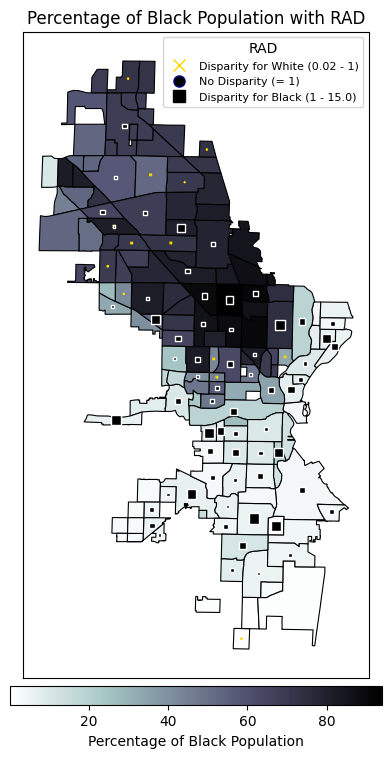

In [71]:
from matplotlib.lines import Line2D
# plotting the percent of black population
fig, ax = plt.subplots(figsize = (16, 10))

RAD_merged.plot(ax = ax, column = "percent_blackpop_100",
                cmap = "bone_r",
                legend = True,
                edgecolor = "black",
                linewidth = 0.8,
                legend_kwds = {
                    "shrink" : 0.3,
                    "orientation" : "horizontal",
                    "pad" : 0.01,
                    "label" : f"Percentage of Black Population"
                })

# calculate the center point of each neighborhood
centroids = RAD_merged.geometry.centroid
x_coords = centroids.x
y_coords = centroids.y 
rad_values = RAD_merged["RAD_2"]

# calculate circles based on total stop rate
bubble_sizes = RAD_merged["RAD_2"] * 4

# markers for each group
mask_white = rad_values < 1
mask_black = rad_values > 0.9 
mask_equal = rad_values == 1

# add in the bubbles with different markers
ax.scatter(x_coords[mask_white], y_coords[mask_white], 
           s = bubble_sizes[mask_white], c = "gold", marker = "x",
           alpha = 1, edgecolor = "white", linewidth = 1,
           label = "Disparity for White Inds")

ax.scatter(x_coords[mask_equal], y_coords[mask_equal],
           s = bubble_sizes[mask_equal], c = "navy", marker = "o",
           edgecolor = "white", linewidth = 1, label = "No Disparity")

ax.scatter(x_coords[mask_black], y_coords[mask_black],
           s = bubble_sizes[mask_black], c = "black", marker = "s",
           edgecolor = "white", linewidth = 1, label = "Disparity for Black Inds")

ax.set_title("Percentage of Black Population with RAD")

# anchor values
valid_values = RAD_merged["RAD_2"]
min_val = (round(valid_values.min(), 2) + 0.01)
max_val = round(valid_values.max(), 2)
size_white = min_val
size_nodisp = 1
size_black = max_val

legend_labels = [
    f"Disparity for White Individuals ({min_val}- 0.99)",
    f"No Disparity (= 1)",
    f"Disparity for Black Individuals (1.01 - {max_val})"
]

legend_sizes = [size_white, size_nodisp, size_black]

legend_elements = [
    Line2D([0], [0], marker = 'x', color = 'gold', label = f'Disparity for White ({min_val +0.01} - 1)',
           markerfacecolor = 'black', markersize = 8, linestyle = 'None'),
    Line2D([0], [0], marker = 'o', color = 'navy', label = f'No Disparity (= 1)',
           markerfacecolor = 'black', markersize = 8, linestyle = 'None'),
    Line2D([0], [0], marker = 's', color = 'black', label = f'Disparity for Black (1 - {max_val})',
           markerfacecolor = 'black', markersize = 8, linestyle = 'None')
]

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(handles = legend_elements, title = "RAD", 
          loc = "upper right", bbox_to_anchor = (1, 1),
          frameon = True, fontsize = 8, title_fontsize = 10)


## with no distinct markers but just based on size of RAD

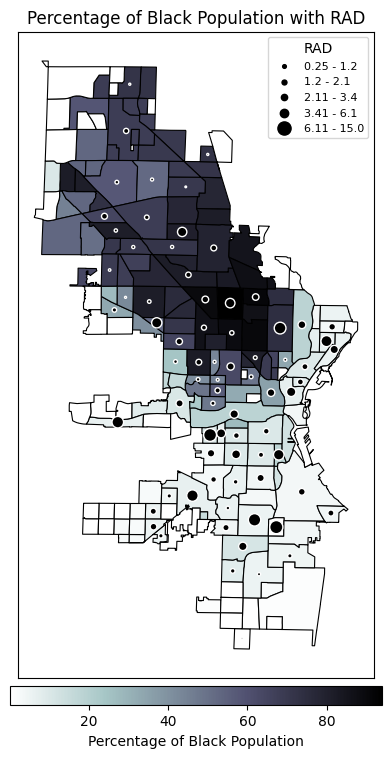

In [45]:
# plotting the percent of black population
fig, ax = plt.subplots(figsize = (16, 10))

RAD_merged.plot(ax = ax, column = "percent_blackpop_100",
                cmap = "bone_r",
                legend = True,
                edgecolor = "black",
                linewidth = 0.8,
                missing_kwds = {"color": "white"},
                legend_kwds = {
                    "shrink" : 0.3,
                    "orientation" : "horizontal",
                    "pad" : 0.01,
                    "label" : f"Percentage of Black Population"
                })

# calculate the center point of each neighborhood
centroids = RAD_merged.geometry.centroid
x_coords = centroids.x
y_coords = centroids.y 

# Create a subset DataFrame with only non-NaN RAD_2 values for the scatter plot
RAD_valid = RAD_merged.dropna(subset=["RAD_2"])
RAD_valid = RAD_valid[RAD_valid["RAD_2"] > 0] 

# Only calculate centroids and sizes for valid RAD neighborhoods
valid_centroids = RAD_valid.geometry.centroid
valid_x = valid_centroids.x
valid_y = valid_centroids.y
valid_sizes = RAD_valid["RAD_2"] * 6

# Add bubbles only for neighborhoods with valid RAD values
ax.scatter(valid_x, valid_y, s = valid_sizes, c = "black", alpha = 1,
           edgecolor = "white", linewidth = 1)

ax.set_title("Percentage of Black Population with RAD")

# Use valid values for the legend
valid_values = RAD_valid["RAD_2"]
lowest_val = round(np.percentile(valid_values, 20), 1)
low_val = round(np.percentile(valid_values, 40), 1)
med_val = round(np.percentile(valid_values, 60), 1)
high_val = round(np.percentile(valid_values, 80), 1)
highest_val = round(np.percentile(valid_values, 100), 1)

min_val = (round(valid_values.min(), 2))
max_val = round(valid_values.max(), 2)
size_lowest = lowest_val
size_low = low_val
size_med = med_val
size_high = high_val
size_highest = highest_val

legend_labels = [
    f"{min_val} - {size_lowest}",
    f"{size_lowest} - {size_low}",
    f"{size_low + 0.01} - {size_med}",
    f"{round(size_med + 0.01, 2)} - {size_high}",
    f"{round(size_high + 0.01, 2)} - {size_highest}"
]

legend_sizes = [size_lowest, size_low, size_med, size_high, size_highest, max_val]

legend_elements = [
    ax.scatter([], [], s = size * 6, c = "black", alpha = 1,
               edgecolors = "black", linewidth = 1, label = label)
    for size, label in zip(legend_sizes, legend_labels)
]

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(handles = legend_elements, title = "RAD", 
          loc = "upper right", bbox_to_anchor = (1, 1),
          frameon = True, fontsize = 8, title_fontsize = 10)

# Plotting % White population (color) and RAD (marker)

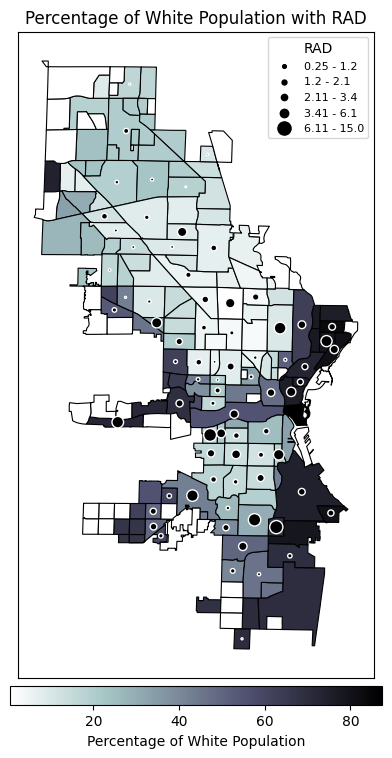

In [46]:
# plotting the percent of black population
fig, ax = plt.subplots(figsize = (16, 10))

RAD_merged.plot(ax = ax, column = "percent_whitepop_100",
                cmap = "bone_r",
                legend = True,
                edgecolor = "black",
                linewidth = 0.8,
                missing_kwds = {"color": "white"},
                legend_kwds = {
                    "shrink" : 0.3,
                    "orientation" : "horizontal",
                    "pad" : 0.01,
                    "label" : f"Percentage of White Population"
                })

# calculate the center point of each neighborhood
centroids = RAD_merged.geometry.centroid
x_coords = centroids.x
y_coords = centroids.y 

# Create a subset DataFrame with only non-NaN RAD_2 values for the scatter plot
RAD_valid = RAD_merged.dropna(subset=["RAD_2"])
RAD_valid = RAD_valid[RAD_valid["RAD_2"] > 0] 

# Only calculate centroids and sizes for valid RAD neighborhoods
valid_centroids = RAD_valid.geometry.centroid
valid_x = valid_centroids.x
valid_y = valid_centroids.y
valid_sizes = RAD_valid["RAD_2"] * 6

# Add bubbles only for neighborhoods with valid RAD values
ax.scatter(valid_x, valid_y, s = valid_sizes, c = "black", alpha = 1,
           edgecolor = "white", linewidth = 1)

ax.set_title("Percentage of White Population with RAD")

# Use valid values for the legend
valid_values = RAD_valid["RAD_2"]
lowest_val = round(np.percentile(valid_values, 20), 1)
low_val = round(np.percentile(valid_values, 40), 1)
med_val = round(np.percentile(valid_values, 60), 1)
high_val = round(np.percentile(valid_values, 80), 1)
highest_val = round(np.percentile(valid_values, 100), 1)

min_val = (round(valid_values.min(), 2))
max_val = round(valid_values.max(), 2)
size_lowest = lowest_val
size_low = low_val
size_med = med_val
size_high = high_val
size_highest = highest_val

legend_labels = [
    f"{min_val} - {size_lowest}",
    f"{size_lowest} - {size_low}",
    f"{size_low + 0.01} - {size_med}",
    f"{round(size_med + 0.01, 2)} - {size_high}",
    f"{round(size_high + 0.01, 2)} - {size_highest}"
]

legend_sizes = [size_lowest, size_low, size_med, size_high, size_highest, max_val]

legend_elements = [
    ax.scatter([], [], s = size * 6, c = "black", alpha = 1,
               edgecolors = "black", linewidth = 1, label = label)
    for size, label in zip(legend_sizes, legend_labels)
]

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(handles = legend_elements, title = "RAD", 
          loc = "upper right", bbox_to_anchor = (1, 1),
          frameon = True, fontsize = 8, title_fontsize = 10)

# Plotting Total Victimization (neighborhood color) with RAD index (plot point)

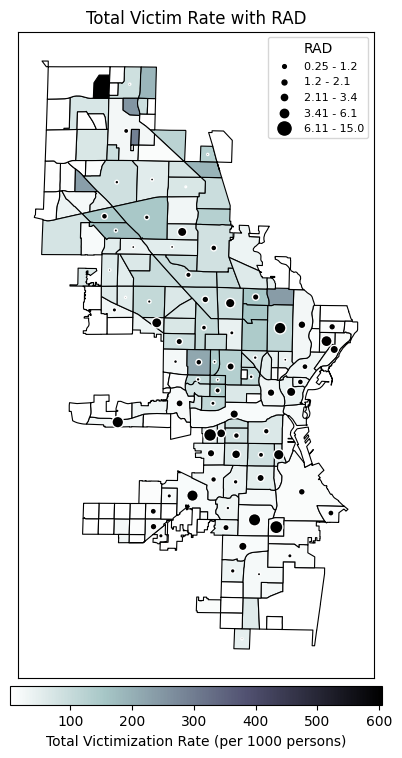

In [47]:
# plotting the percent of black population
fig, ax = plt.subplots(figsize = (16, 10))

RAD_merged.plot(ax = ax, column = "total_victimization_per1000",
                cmap = "bone_r",
                legend = True,
                edgecolor = "black",
                linewidth = 0.8,
                missing_kwds = {"color": "white"},
                legend_kwds = {
                    "shrink" : 0.3,
                    "orientation" : "horizontal",
                    "pad" : 0.01,
                    "label" : f"Total Victimization Rate (per 1000 persons)"
                })

# calculate the center point of each neighborhood
centroids = RAD_merged.geometry.centroid
x_coords = centroids.x
y_coords = centroids.y 

# Create a subset DataFrame with only non-NaN RAD_2 values for the scatter plot
RAD_valid = RAD_merged.dropna(subset=["RAD_2"])
RAD_valid = RAD_valid[RAD_valid["RAD_2"] > 0] 

# Only calculate centroids and sizes for valid RAD neighborhoods
valid_centroids = RAD_valid.geometry.centroid
valid_x = valid_centroids.x
valid_y = valid_centroids.y
valid_sizes = RAD_valid["RAD_2"] * 6

# Add bubbles only for neighborhoods with valid RAD values
ax.scatter(valid_x, valid_y, s = valid_sizes, c = "black", alpha = 1,
           edgecolor = "white", linewidth = 1)

ax.set_title("Total Victim Rate with RAD")

# Use valid values for the legend
valid_values = RAD_valid["RAD_2"]
lowest_val = round(np.percentile(valid_values, 20), 1)
low_val = round(np.percentile(valid_values, 40), 1)
med_val = round(np.percentile(valid_values, 60), 1)
high_val = round(np.percentile(valid_values, 80), 1)
highest_val = round(np.percentile(valid_values, 100), 1)

min_val = (round(valid_values.min(), 2))
max_val = round(valid_values.max(), 2)
size_lowest = lowest_val
size_low = low_val
size_med = med_val
size_high = high_val
size_highest = highest_val

legend_labels = [
    f"{min_val} - {size_lowest}",
    f"{size_lowest} - {size_low}",
    f"{size_low + 0.01} - {size_med}",
    f"{round(size_med + 0.01, 2)} - {size_high}",
    f"{round(size_high + 0.01, 2)} - {size_highest}"
]

legend_sizes = [size_lowest, size_low, size_med, size_high, size_highest, max_val]

legend_elements = [
    ax.scatter([], [], s = size * 6, c = "black", alpha = 1,
               edgecolors = "black", linewidth = 1, label = label)
    for size, label in zip(legend_sizes, legend_labels)
]

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.legend(handles = legend_elements, title = "RAD", 
          loc = "upper right", bbox_to_anchor = (1, 1),
          frameon = True, fontsize = 8, title_fontsize = 10)

# Plotting total victimization with RAD_interpreted

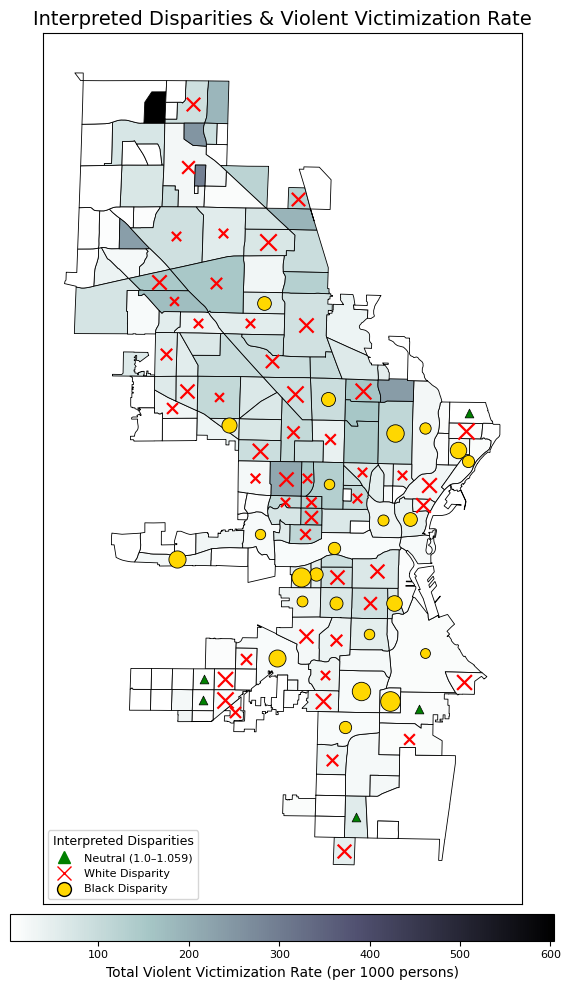

In [199]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines  
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# starting our plot
fig, ax = plt.subplots(figsize=(16, 10))

# plotting the neighborhood color with victimization rate
new_RAD_df_merged.plot(
    ax = ax,
    column = "total_victimization_per1000",
    cmap = "bone_r",
    norm = mcolors.Normalize( # normalizing our data for victimization for plotting
        vmin = new_RAD_df_merged["total_victimization_per1000"].min(),
        vmax = new_RAD_df_merged["total_victimization_per1000"].max()
    ),
    edgecolor = "black",
    linewidth = 0.6,
    missing_kwds = {"color": "white"},
    legend = False
)

# plotting the RAD_interpreted as different markers
for idx, row in new_RAD_df_merged.iterrows(): # goes through every row in dataset
    val = row["RAD_interpreted"] # for each neighborhood, find the center point to place a marker there
    centroid = row["geometry"].centroid
    x, y = centroid.x, centroid.y

    # assigning marker type and size based on RAD_interpreted values
    # for neutral values
    if val <= 1.059:
        ax.scatter(x, y, marker = "^", color="green", s = 40, edgecolor="black", linewidth = 0.5, zorder =3 )
    
    # for white disparity
    elif white_min <= val <= white_max:
    
        size = 40 + 100 * ((val - white_min) / (white_max - white_min))
        ax.scatter(x, y, marker = "x", color = "red", s = size, linewidths = 1.6, zorder = 3)
    
    # for black disparity
    elif val > white_max:
        size = 50 + 150 * ((val - white_max) / (black_max - white_max))
        ax.scatter(x, y, marker = "o", color = "gold", s = size, edgecolor = "black", linewidth = 0.6, zorder = 3)

# adding in our legend for the victimization colorbar
sm = plt.cm.ScalarMappable(cmap = "bone_r", norm = plt.Normalize(
    vmin = new_RAD_df_merged["total_victimization_per1000"].min(),
    vmax = new_RAD_df_merged["total_victimization_per1000"].max()
))
cbar = plt.colorbar(sm, ax = ax, orientation = "horizontal", fraction = 0.03, pad = 0.01)
cbar.set_label("Total Violent Victimization Rate (per 1000 persons)", fontsize = 10)
cbar.ax.tick_params(labelsize = 8)

# adding in the legend for the markers
legend_elements = [
    mlines.Line2D([], [], color = 'green', marker = '^', linestyle = 'None',
                  markersize = 8, label = 'Neutral (1.0–1.059)'),

    mlines.Line2D([], [], color = 'red', marker = 'x', linestyle = 'None',
                  markersize = 10, label = 'White Disparity'),

    mlines.Line2D([], [], color = 'gold', marker = 'o', linestyle = 'None',
                  markeredgecolor = 'black', markersize = 10, label = 'Black Disparity')
]

ax.legend(handles = legend_elements, title = "Interpreted Disparities", loc = 'lower left', fontsize = 8, title_fontsize = 9)
ax.set_title("Interpreted Disparities & Violent Victimization Rate", fontsize = 14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()


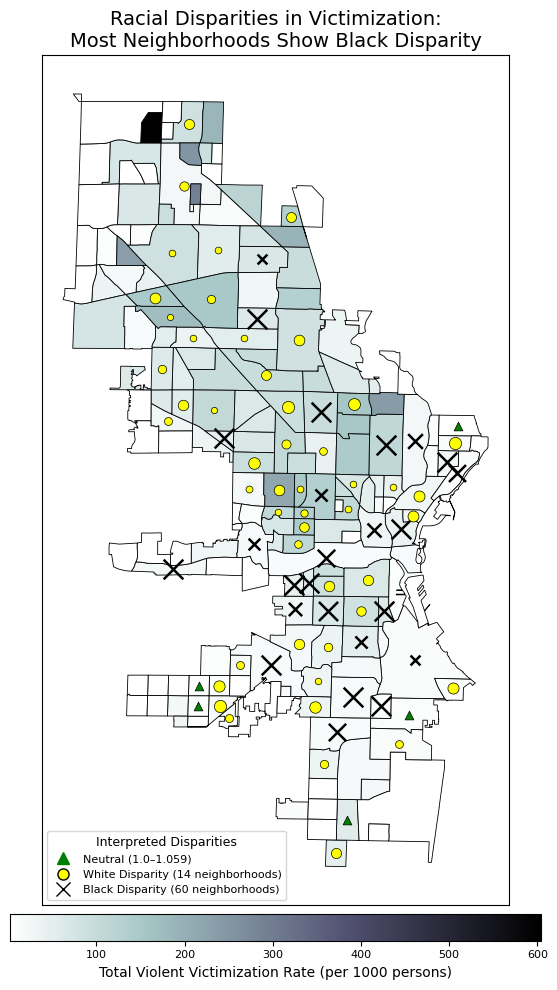

In [224]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Starting our plot
fig, ax = plt.subplots(figsize=(16, 10))

# Plotting the neighborhood color with victimization rate
new_RAD_df_merged.plot(
    ax=ax,
    column="total_victimization_per1000",
    cmap="bone_r",
    norm=mcolors.Normalize(
        vmin=new_RAD_df_merged["total_victimization_per1000"].min(),
        vmax=new_RAD_df_merged["total_victimization_per1000"].max()
    ),
    edgecolor="black",
    linewidth=0.6,
    missing_kwds={"color": "white"},
    legend=False
)

# Threshold values from your data
white_min = 1.0667
white_max = 4.0277

# Plotting the RAD_interpreted as different markers
for idx, row in new_RAD_df_merged.iterrows():
    val = row["RAD_interpreted"]
    centroid = row["geometry"].centroid
    x, y = centroid.x, centroid.y

    # Neutral disparity
    if val <= 1.059:
        ax.scatter(x, y, marker="^", color="green", s=40,
                   edgecolor="black", linewidth=0.5, zorder=3)

    # White disparity — lighter, smaller circles
    elif white_min <= val <= white_max:
        size = 20 + 60 * ((val - white_min) / (white_max - white_min))
        ax.scatter(x, y, marker="o", color="yellow", s=size,
                   edgecolor="black", linewidth=0.5, zorder=3)

    # Black disparity — dominant, bold X markers, scaled
    elif val > white_max:
        capped_val = min(val, 7.0)  # Capping for visualization
        size = 50 + 150 * ((capped_val - white_max) / (7.0 - white_max))
        ax.scatter(x, y, marker="x", color="black", s=size,
                   linewidths=1.8, zorder=3)

# Colorbar for victimization rate
sm = plt.cm.ScalarMappable(cmap="bone_r", norm=plt.Normalize(
    vmin=new_RAD_df_merged["total_victimization_per1000"].min(),
    vmax=new_RAD_df_merged["total_victimization_per1000"].max()
))
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.01)
cbar.set_label("Total Violent Victimization Rate (per 1000 persons)", fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Marker legend
legend_elements = [
    mlines.Line2D([], [], color='green', marker='^', linestyle='None',
                  markersize=8, label='Neutral (1.0–1.059)'),

    mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                  markeredgecolor='black', markersize=8,
                  label='White Disparity (14 neighborhoods)'),

    mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                  markersize=10, label='Black Disparity (60 neighborhoods)')
]

ax.legend(handles=legend_elements, title="Interpreted Disparities",
          loc='lower left', fontsize=8, title_fontsize=9)

# Enhanced title for storytelling
ax.set_title("Racial Disparities in Victimization:\nMost Neighborhoods Show Black Disparity", fontsize=14)

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()


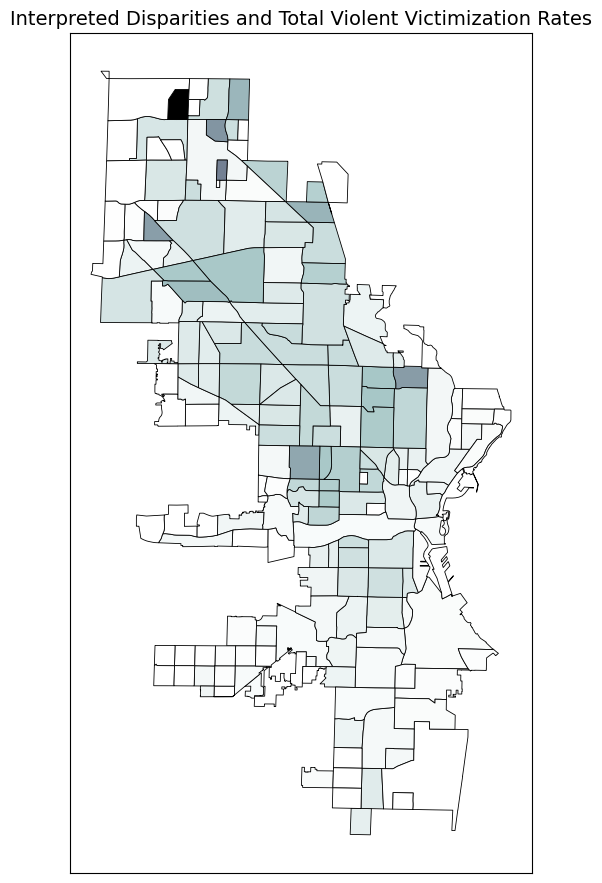

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Starting our plot with extra bottom margin
fig = plt.figure(figsize=(16, 12))  # Increased figure height

# Create axes with adjusted position to leave space at bottom
# The parameters are: [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.2, 0.8, 0.7])  # More bottom margin (0.2 instead of default ~0.1)

# Define EXPLICIT lists of white and black disparity values from your RAD_interpreted
white_disparity_values = [1.066666667, 1.07273, 1.20137, 1.20833, 1.22727, 1.23537, 1.24868, 
                          1.46154, 1.904347826, 2.61111, 2.68421, 2.75, 2.89286, 4.02778]

black_disparity_values = [1.084070796, 1.172093023, 1.180327869, 1.21021611, 1.216216216,
                         1.260504202, 1.295180723, 1.583333333, 1.603053435, 1.636363636,
                         1.714285714, 1.714285714, 1.75, 1.844280443, 1.869565217, 1.928571429,
                         2.173817382, 2.340425532, 2.369387755, 2.425799087, 2.581005587,
                         2.828571429, 2.864864865, 2.904191617, 2.93990755, 3.000631712,
                         3.055702918, 3.12195122, 3.164516129, 3.25, 3.333333333, 3.461538462,
                         3.525423729, 3.669758813, 3.885714286, 3.888888889, 3.9, 4.041811847,
                         4.444444444, 4.555309735, 4.568095238, 4.850877193, 5.039123631,
                         5.253608247, 6, 6.111111111, 6.176470588, 6.800472255, 7.071428571,
                         7.5256917, 7.531343284, 7.821552723, 9.013513514, 9.625, 10.675,
                         11.36363636, 11.55555556, 11.92483349, 13.30909091, 14.33333333, 15]

# Plotting the neighborhood color with victimization rate
new_RAD_df_merged.plot(
    ax=ax,
    column="total_victimization_per1000",
    cmap="bone_r",
    norm=mcolors.Normalize(
        vmin=new_RAD_df_merged["total_victimization_per1000"].min(),
        vmax=new_RAD_df_merged["total_victimization_per1000"].max()
    ),
    edgecolor="black",
    linewidth=0.6,
    missing_kwds={"color": "white"},
    legend=False
)

# Enhanced title for storytelling
ax.set_title("Interpreted Disparities and Total Violent Victimization Rates", fontsize=14)

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [ ]:
white_disparity_values = [1.066666667, 1.07273, 1.20137, 1.20833, 1.22727, 1.23537, 1.24868, 
                          1.46154, 1.904347826, 2.61111, 2.68421, 2.75, 2.89286, 4.02778]

black_disparity_values = [1.084070796, 1.172093023, 1.180327869, 1.21021611, 1.216216216,
                         1.260504202, 1.295180723, 1.583333333, 1.603053435, 1.636363636,
                         1.714285714, 1.714285714, 1.75, 1.844280443, 1.869565217, 1.928571429,
                         2.173817382, 2.340425532, 2.369387755, 2.425799087, 2.581005587,
                         2.828571429, 2.864864865, 2.904191617, 2.93990755, 3.000631712,
                         3.055702918, 3.12195122, 3.164516129, 3.25, 3.333333333, 3.461538462,
                         3.525423729, 3.669758813, 3.885714286, 3.888888889, 3.9, 4.041811847,
                         4.444444444, 4.555309735, 4.568095238, 4.850877193, 5.039123631,
                         5.253608247, 6, 6.111111111, 6.176470588, 6.800472255, 7.071428571,
                         7.5256917, 7.531343284, 7.821552723, 9.013513514, 9.625, 10.675,
                         11.36363636, 11.55555556, 11.92483349, 13.30909091, 14.33333333, 15]


C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_19320\4069228786.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  yellow_cmap = cm.get_cmap('YlOrBr')
C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_19320\4069228786.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blue_cmap = cm.get_cmap('Blues')
C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_19320\4069228786.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


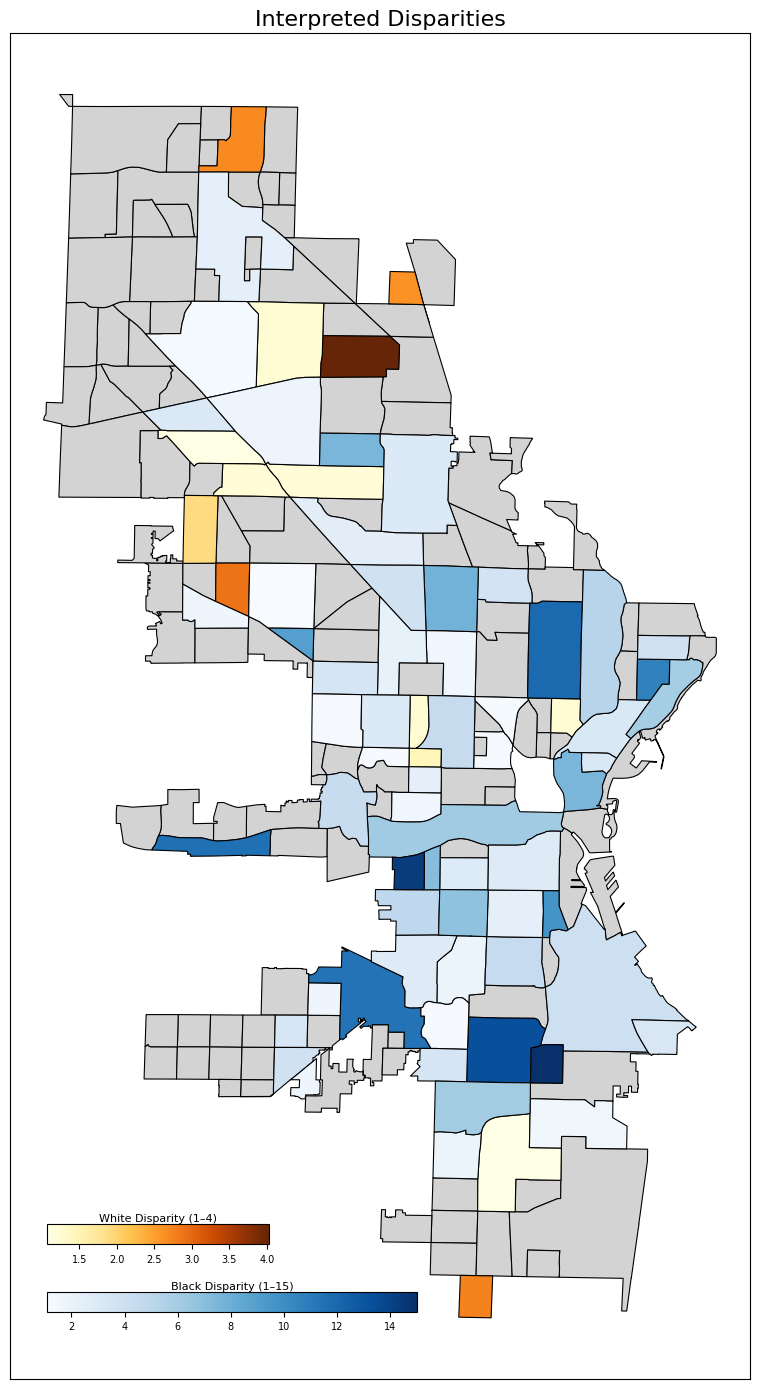

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Step 1: Subset the data
no_data = new_RAD_df_merged[
    (new_RAD_df_merged['RAD_interpreted'].isna()) |
    (new_RAD_df_merged['RAD_interpreted'] == 0)
]

valid_data = new_RAD_df_merged[
    (new_RAD_df_merged['RAD_interpreted'].notna()) &
    (new_RAD_df_merged['RAD_interpreted'] != 0)
]

white_disparity = valid_data[valid_data['RADType'] == 'white']
black_disparity = valid_data[valid_data['RADType'] == 'black']

# Step 2: Create separate colormaps and normalization for each group
# Normalize yellow (white disparity)
white_norm = Normalize(
    vmin=white_disparity['RAD_interpreted'].min(),
    vmax=white_disparity['RAD_interpreted'].max()
)
yellow_cmap = cm.get_cmap('YlOrBr')

# Normalize blue (black disparity)
black_norm = Normalize(
    vmin=black_disparity['RAD_interpreted'].min(),
    vmax=black_disparity['RAD_interpreted'].max()
)
blue_cmap = cm.get_cmap('Blues')

# Step 3: Plot
fig, ax = plt.subplots(figsize=(12, 14))

# Background for NA or 0 values
no_data.plot(ax=ax, color='lightgray', edgecolor='black', linewidth = 0.8)

# White disparity (yellow gradient)
white_disparity.plot(
    column='RAD_interpreted',
    cmap=yellow_cmap,
    norm=white_norm,
    ax=ax,
    edgecolor='black',
    linewidth=0.8
)

# Black disparity (blue gradient)
black_disparity.plot(
    column='RAD_interpreted',
    cmap=blue_cmap,
    norm=black_norm,
    ax=ax,
    edgecolor='black',
    linewidth=0.8
)

# --- YELLOW (White Disparity) colorbar ---
axins_white = inset_axes(
    ax,
    width="30%",       # Short width
    height="1.5%",     # Thin height
    loc='lower left',
    bbox_to_anchor=(0.05, 0.1, 1, 1),  # Lower position to avoid map
    bbox_transform=ax.transAxes,
    borderpad=0,
)

sm_white = ScalarMappable(norm=white_norm, cmap=yellow_cmap)
sm_white._A = []
cbar_white = plt.colorbar(sm_white, cax=axins_white, orientation='horizontal')

# Resize everything
cbar_white.ax.tick_params(labelsize=7)  # Smaller tick labels
axins_white.set_title("White Disparity (1–4)", fontsize=8, pad=2)  # Smaller label

# --- BLUE (Black Disparity) colorbar ---
axins_black = inset_axes(
    ax,
    width="50%",       # Longer bar
    height="1.5%",     # Same thin height
    loc='lower left',
    bbox_to_anchor=(0.05, 0.05, 1, 1),
    bbox_transform=ax.transAxes,
    borderpad=0,
)

sm_black = ScalarMappable(norm=black_norm, cmap=blue_cmap)
sm_black._A = []
cbar_black = plt.colorbar(sm_black, cax=axins_black, orientation='horizontal')
cbar_black.ax.tick_params(labelsize=7)
axins_black.set_title("Black Disparity (1–15)", fontsize=8, pad=2)

plt.subplots_adjust(bottom=0.15)


# Final polish
ax.set_title("Interpreted Disparities", fontsize=16)

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')


plt.tight_layout()
plt.show()


C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_19320\1354028450.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  yellow_cmap = cm.get_cmap('YlOrBr')
C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_19320\1354028450.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blue_cmap = cm.get_cmap('Blues')
C:\Users\michelle.iolow\AppData\Local\Temp\ipykernel_19320\1354028450.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


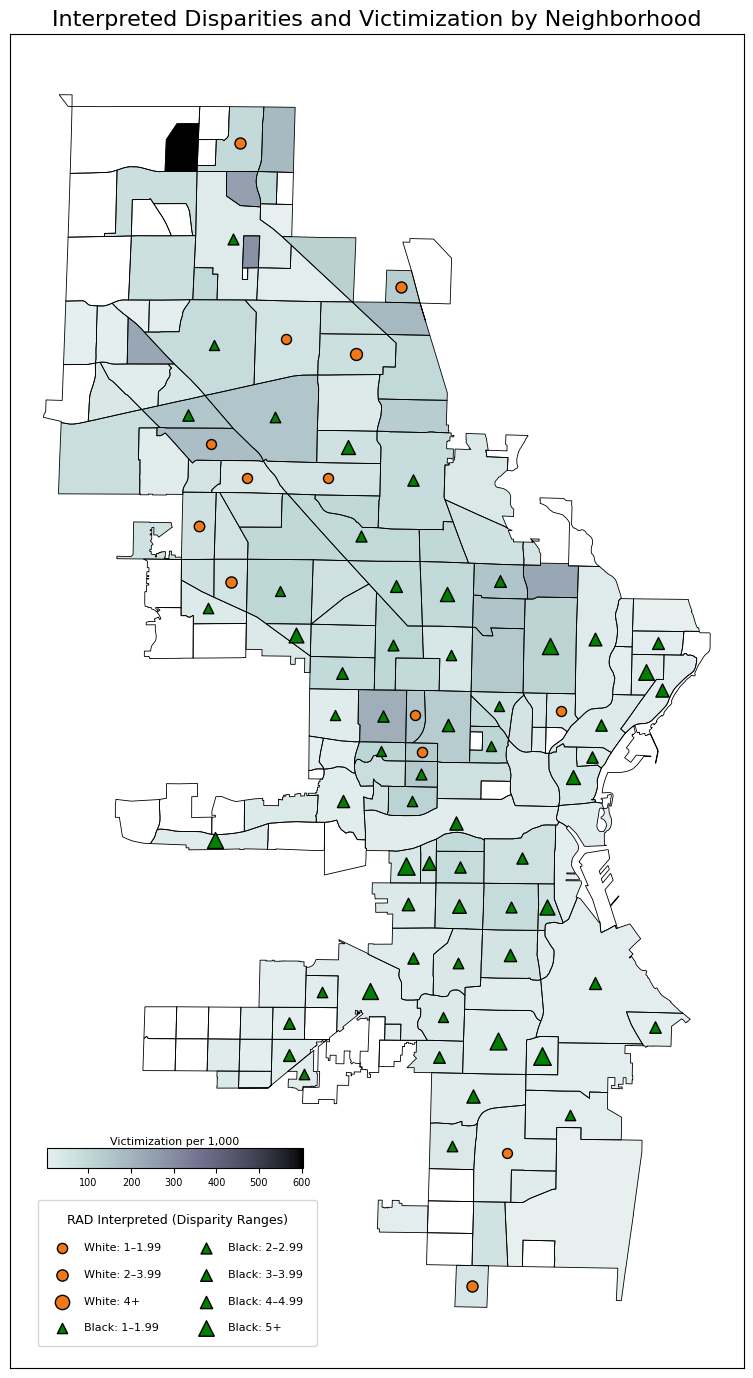

In [93]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Step 1: Subset the data ---
no_data = new_RAD_df_merged[
    (new_RAD_df_merged['RAD_interpreted'].isna()) |
    (new_RAD_df_merged['RAD_interpreted'] == 0)
]

valid_data = new_RAD_df_merged[
    (new_RAD_df_merged['RAD_interpreted'].notna()) & 
    (new_RAD_df_merged['RAD_interpreted'] != 0)
]

white_disparity = valid_data[valid_data['RADType'] == 'white']
black_disparity = valid_data[valid_data['RADType'] == 'black']

# --- Step 2: Set up colormaps and normalization ---
min_disparity = min(valid_data['RAD_interpreted'].min(), 1)
max_disparity = max(valid_data['RAD_interpreted'].max(), 5)
disparity_norm = Normalize(vmin=min_disparity, vmax=max_disparity)

yellow_cmap = cm.get_cmap('YlOrBr')
blue_cmap = cm.get_cmap('Blues')

# Custom intensified victimization colormap
colors = plt.cm.bone_r(np.linspace(0.1, 1, 256))
gamma = 0.7
colors[:, :3] = colors[:, :3] ** gamma
custom_cmap = LinearSegmentedColormap.from_list('contrast_bone_r', colors)

victim_norm = Normalize(
    vmin=new_RAD_df_merged['total_victimization_per1000'].min(),
    vmax=new_RAD_df_merged['total_victimization_per1000'].max()
)
victim_cmap = custom_cmap

# --- Marker size function ---
def get_marker_size(val):
    base = 50
    scale = 110
    return base + scale * disparity_norm(val)

# --- Step 3: Create plot ---
fig, ax = plt.subplots(figsize=(12, 14))

# Neighborhood boundaries
new_RAD_df_merged.boundary.plot(
    linewidth=0.6,
    edgecolor='black',
    ax=ax,
    zorder=2
)

# Choropleth of victimization
new_RAD_df_merged.plot(
    column='total_victimization_per1000',
    cmap=victim_cmap,
    norm=victim_norm,
    linewidth=0,
    ax=ax,
    zorder=1,
    missing_kwds={"color": "white"}
)

# --- Plot markers ---
# White Disparity (Yellow Circles)
for _, row in white_disparity.iterrows():
    centroid = row.geometry.centroid
    size = get_marker_size(row['RAD_interpreted'])
    ax.scatter(centroid.x, centroid.y, s=size, color=yellow_cmap(0.6),
               edgecolor='black', marker='o', zorder=3)

# Black Disparity (Green Triangles)
for _, row in black_disparity.iterrows():
    centroid = row.geometry.centroid
    size = get_marker_size(row['RAD_interpreted'])
    ax.scatter(centroid.x, centroid.y, s=size, color='green',
               edgecolor='black', marker='^', zorder=3)

# --- Legends ---
white_ranges = [("1–1.99", 1.5), ("2–3.99", 3), ("4+", 5)]
black_ranges = [("1–1.99", 1.5), ("2–2.99", 2.5), ("3–3.99", 3.5), ("4–4.99", 4.5), ("5+", 5.5)]

white_legend = []
for label, mid in white_ranges:
    size = get_marker_size(mid)
    if label == "4+":
        size *= 1.3  # Emphasis only in legend
    white_legend.append(
        plt.scatter([], [], s=size, color=yellow_cmap(0.6),
                    edgecolor='black', marker='o', label=f'White: {label}')
    )

black_legend = []
for label, mid in black_ranges:
    size = get_marker_size(mid)
    if label == "5+":
        size *= 1.45  # Emphasis only in legend
    black_legend.append(
        plt.scatter([], [], s=size, color='green',
                    edgecolor='black', marker='^', label=f'Black: {label}')
    )

legend = ax.legend(
    handles=white_legend + black_legend,
    title="RAD Interpreted (Disparity Ranges)",
    loc='upper left',
    bbox_to_anchor=(0.03, 0.13),
    fontsize=8,
    title_fontsize=9,
    frameon=True,
    labelspacing=1.5,
    ncol=2,
    handletextpad=1.0,
    columnspacing=3.0,
    borderpad=1.2
)

# --- Victimization Colorbar ---
axins_victim = inset_axes(ax, width="35%", height="1.5%", loc='lower left',
                          bbox_to_anchor=(0.05, 0.15, 1, 1),
                          bbox_transform=ax.transAxes, borderpad=0)

sm_victim = ScalarMappable(norm=victim_norm, cmap=victim_cmap)
sm_victim._A = []
cbar_victim = plt.colorbar(sm_victim, cax=axins_victim, orientation='horizontal')
cbar_victim.ax.tick_params(labelsize=7)
axins_victim.set_title("Victimization per 1,000", fontsize=8, pad=2)

# --- Final Touches ---
ax.set_title("Interpreted Disparities and Victimization by Neighborhood", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- Step 1: Subset the data ---
no_data = new_RAD_df_merged[
    (new_RAD_df_merged['RAD_interpreted'].isna()) |
    (new_RAD_df_merged['RAD_interpreted'] == 0)
]

valid_data = new_RAD_df_merged[
    (new_RAD_df_merged['RAD_interpreted'].notna()) & 
    (new_RAD_df_merged['RAD_interpreted'] != 0)
]

white_disparity = valid_data[valid_data['RADType'] == 'white']
black_disparity = valid_data[valid_data['RADType'] == 'black']

# --- Step 2: Set up colormaps and normalization ---
# Create a SINGLE normalization for both disparities to ensure consistent sizing
min_disparity = min(valid_data['RAD_interpreted'].min(), 1)  # Start at 1 minimum
max_disparity = max(valid_data['RAD_interpreted'].max(), 5)  # Ensure it covers at least up to 5

disparity_norm = Normalize(vmin=min_disparity, vmax=max_disparity)

yellow_cmap = cm.get_cmap('YlOrBr')
blue_cmap = cm.get_cmap('Blues')

# Intensify bone_r colormap by applying gamma correction to darken low values
colors = plt.cm.bone_r(np.linspace(0.1, 1, 256))
gamma = 0.7  # Darkens lower part, preserves smooth gradient
colors[:, :3] = colors[:, :3] ** gamma
custom_cmap = LinearSegmentedColormap.from_list('contrast_bone_r', colors)

victim_norm = Normalize(
    vmin=new_RAD_df_merged['total_victimization_per1000'].min(),
    vmax=new_RAD_df_merged['total_victimization_per1000'].max()
)
victim_cmap = custom_cmap

# --- Marker size functions ---
def get_white_marker_size(val):
    return 60 + 100 * disparity_norm(val)

def get_black_marker_size(val):
    if val > 4.99:
        return 80 + 100 * disparity_norm(val) * 1.5  # Visually emphasized
    else:
        return 60 + 100 * disparity_norm(val)

# --- Step 3: Create plot ---
fig, ax = plt.subplots(figsize=(12, 14))


# Draw neighborhood boundaries
new_RAD_df_merged.boundary.plot(
    linewidth=0.6,
    edgecolor='black',
    ax=ax,
    zorder=2
)

# Choropleth layer with intensified victimization colors
new_RAD_df_merged.plot(
    column='total_victimization_per1000',
    cmap=victim_cmap,
    norm=victim_norm,
    linewidth=0,
    ax=ax,
    zorder=1,
    missing_kwds={"color": "white"}  # High contrast with light grey
)

# --- Plot markers for disparities ---
# White Disparity (Yellow Circles)
for _, row in white_disparity.iterrows():
    centroid = row.geometry.centroid
    color = yellow_cmap(0.6)
    size = get_white_marker_size(row['RAD_interpreted'])
    ax.scatter(centroid.x, centroid.y, s=size, color=color, edgecolor='black', marker='o', zorder=3)

# Black Disparity (Blue Triangles)
for _, row in black_disparity.iterrows():
    centroid = row.geometry.centroid
    color = 'green'
    size = get_black_marker_size(row['RAD_interpreted'])
    ax.scatter(centroid.x, centroid.y, s=size, color=color, edgecolor='black', marker='^', zorder=3)

# --- Legends with Ranges ---
white_ranges = [("1–1.99", 1.5), ("2–3.99", 3), ("4+", 5)]
black_ranges = [("1–1.99", 1.5), ("2–2.99", 2.5), ("3–3.99", 3.5), ("4–4.99", 4.5), ("5+", 5.5)]

white_legend = []
for label, mid in white_ranges:
    size = get_white_marker_size(mid)
    if label == "4+":
        size *= 1.3  # Increase size for "4+" white legend
    white_legend.append(
        plt.scatter([], [], s=size, color=yellow_cmap(0.6),
                    edgecolor='black', marker='o', label=f'White: {label}')
    )

black_legend = []
for label, mid in black_ranges:
    size = get_black_marker_size(mid)
    if label == "5+":
        size *= 1.45  # Increase size for "5+" black legend
    black_legend.append(
        plt.scatter([], [], s=size, color='green',
                    edgecolor='black', marker='^', label=f'Black: {label}')
    )

legend = ax.legend(
    handles=white_legend + black_legend,
    title="RAD Interpreted (Disparity Ranges)",
    loc='upper left',
    bbox_to_anchor=(0.03, 0.13),
    fontsize=8,
    title_fontsize=9,
    frameon=True,
    labelspacing=1.5,
    ncol=2,
    handletextpad=1.0,
    columnspacing=3.0, borderpad = 1.2
)

# --- Victimization Colorbar ---
axins_victim = inset_axes(ax, width="35%", height="1.5%", loc='lower left',
                          bbox_to_anchor=(0.05, 0.15, 1, 1),
                          bbox_transform=ax.transAxes, borderpad=0)

sm_victim = ScalarMappable(norm=victim_norm, cmap=victim_cmap)
sm_victim._A = []
cbar_victim = plt.colorbar(sm_victim, cax=axins_victim, orientation='horizontal')
cbar_victim.ax.tick_params(labelsize=7)
axins_victim.set_title("Victimization per 1,000", fontsize=8, pad=2)

# --- Final Touches ---
ax.set_title("Interpreted Disparities and Victimization by Neighborhood", fontsize=16)

# Remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show()